In [1]:
# Install required packages for Jupyter Notebook
!pip install dash seaborn pyproj folium scipy plotly statsmodels
print("Packages installed successfully!")

Packages installed successfully!


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyproj import Transformer
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
import folium
from scipy import stats
import json
from pandas.plotting import scatter_matrix

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
import requests

coll_csv_url = "https://raw.githubusercontent.com/dthomas1108/year4-data-visualisation-assignment/refs/heads/master/collision2017.csv"
r = requests.get(coll_csv_url)

with open("collision2017.csv", "wb") as f:
    f.write(r.content)

print("Collision CSV data downloaded successfully!")

Collision CSV data downloaded successfully!


In [4]:
veh_csv_url = "https://raw.githubusercontent.com/dthomas1108/year4-data-visualisation-assignment/refs/heads/master/vehicle2017.csv"
r = requests.get(veh_csv_url)

with open("vehicle2017.csv", "wb") as f:
    f.write(r.content)

print("Vehicle CSV data downloaded successfully!")

Vehicle CSV data downloaded successfully!


In [5]:
cas_csv_url = "https://raw.githubusercontent.com/dthomas1108/year4-data-visualisation-assignment/refs/heads/master/casualty2017.csv"
r = requests.get(cas_csv_url)

with open("casualty2017.csv", "wb") as f:
    f.write(r.content)

print("Casualty CSV data downloaded successfully!")

Casualty CSV data downloaded successfully!


In [6]:
geojson_url = "https://raw.githubusercontent.com/dthomas1108/year4-data-visualisation-assignment/refs/heads/master/collisions-2017.geojson"
r = requests.get(geojson_url)

with open("collisions-2017.geojson", "wb") as f:
    f.write(r.content)

print("GeoJSON data downloaded successfully!")

# Load and parse the GeoJSON
with open('collisions-2017.geojson', 'r') as f:
    geojson_data = json.load(f)

print(f"Loaded {len(geojson_data['features']):,} collision points from GeoJSON")

GeoJSON data downloaded successfully!
Loaded 6,081 collision points from GeoJSON


# Collision Data
## Reading and Cleaning

In [7]:
# Read collision data
dfCol = pd.read_csv('collision2017.csv')

print(f"Dataset Shape: {dfCol.shape}")
print(f"\nColumns: {list(dfCol.columns)}")
print(f"\nFirst few rows:")
display(dfCol.head())

# Basic statistics
print(f"\nBasic Statistics:")
print(dfCol.describe())

Dataset Shape: (6081, 25)

Columns: ['a_year', 'a_ref', 'a_District', 'a_type', 'a_veh', 'a_cas', 'a_wkday', 'a_day', 'a_month', 'a_hour', 'a_min', 'a_gd1', 'a_gd2', 'a_ctype', 'a_speed', 'a_jdet', 'a_jcont', 'a_pedhum', 'a_pedphys', 'a_light', 'a_weat', 'a_roadsc', 'a_speccs', 'a_chaz', 'a_scene']

First few rows:


,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
0,2017,1,NEMD,3,1,1,SUN,1,1,3,...,,,,,,,,,,
1,2017,2,MEAN,3,2,1,SUN,1,1,3,...,,,,,,,,,,
2,2017,3,ARBC,2,1,1,SUN,1,1,10,...,2,7,1,1,2,10,1,1,1,1
3,2017,4,ANTN,3,2,1,SUN,1,1,10,...,,,,,,,,,,
4,2017,5,ANTN,2,2,2,SUN,1,1,11,...,1,1,1,1,2,1,1,1,1,1



Basic Statistics:
       a_year        a_ref       a_type        a_veh        a_cas  \
count  6081.0  6081.000000  6081.000000  6081.000000  6081.000000   
mean   2017.0  3041.000000     2.873869     1.858083     1.510278   
std       0.0  1755.577825     0.361434     0.635119     0.987888   
min    2017.0     1.000000     1.000000     1.000000     1.000000   
25%    2017.0  1521.000000     3.000000     1.000000     1.000000   
50%    2017.0  3041.000000     3.000000     2.000000     1.000000   
75%    2017.0  4561.000000     3.000000     2.000000     2.000000   
max    2017.0  6081.000000     3.000000     8.000000    22.000000   

             a_day      a_month       a_hour        a_min          a_gd1  \
count  6081.000000  6081.000000  6081.000000  6081.000000    6081.000000   
mean     15.637066     6.703009    13.791646    27.897714  310065.191745   
std       8.780679     3.452060     4.942282    17.656101   33968.228173   
min       1.000000     1.000000     0.000000     0.0000

In [8]:
dfCol.dtypes

a_year         int64
a_ref          int64
a_District    object
a_type         int64
a_veh          int64
a_cas          int64
a_wkday       object
a_day          int64
a_month        int64
a_hour         int64
a_min          int64
a_gd1          int64
a_gd2          int64
a_ctype        int64
a_speed        int64
a_jdet        object
a_jcont       object
a_pedhum      object
a_pedphys     object
a_light       object
a_weat        object
a_roadsc      object
a_speccs      object
a_chaz        object
a_scene       object
dtype: object

In [9]:
# Detect duplicate rows based on the 'a_ref' column
duplicate_rows = dfCol[dfCol.duplicated(subset='a_ref', keep=False)]

# Print the duplicate rows
print("Duplicate rows based on 'a_ref':")
display(duplicate_rows)

Duplicate rows based on 'a_ref':


,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene


### The above should be empty showing 0 duplicates
### The below shows the unique string values (excluding numeric categorised as strings)

In [10]:
for col in dfCol.columns:
    if dfCol[col].dtype == 'object'and col not in ['a_jdet', 'a_jcont','a_pedhum','a_light','a_weat','a_roadsc','a_speccs','a_chaz','a_scene','a_pedphys']:
        unique_values = dfCol[col].unique()
        print(f"Unique values for '{col}':")
        display(unique_values[:20])

Unique values for 'a_District':


array(['NEMD', 'MEAN', 'ARBC', 'ANTN', 'ARND', 'LISC', 'CCGL', 'DCST',
       'BELC', 'MIDU', 'FERO'], dtype=object)

Unique values for 'a_wkday':


array(['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'], dtype=object)

## Adding NaN
### Step 1: Quantify Missingness

In [11]:
# Define the values to consider as missing
missing_values = [' ','', 'Unknown', np.nan]

# Iterate through each column and count missing values
for col in dfCol.columns:
    if col in ['a_District','a_wkday']: continue
    missing_count = dfCol[col].isin(missing_values).sum() + dfCol[col].isna().sum()
    if missing_count > 0:
        print(f"Column '{col}': {missing_count} missing values")

Column 'a_jdet': 5376 missing values
Column 'a_jcont': 5376 missing values
Column 'a_pedhum': 5376 missing values
Column 'a_pedphys': 5376 missing values
Column 'a_light': 5376 missing values
Column 'a_weat': 5376 missing values
Column 'a_roadsc': 5376 missing values
Column 'a_speccs': 5376 missing values
Column 'a_chaz': 5376 missing values
Column 'a_scene': 5376 missing values


### 10 Columns are missing 5376 values (Over 88% of each of these columns is missing), this is substantial.
### Step 2: replace missing with NaN

In [12]:
missing_values = [' ','', 'Unknown', np.nan]
dfCol.replace(missing_values, np.nan, inplace=True)
dfCol.head(10)

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
0,2017,1,NEMD,3,1,1,SUN,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,2,MEAN,3,2,1,SUN,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,3,ARBC,2,1,1,SUN,1,1,10,...,2,7,1,1,2,10,1,1,1,1
3,2017,4,ANTN,3,2,1,SUN,1,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,5,ANTN,2,2,2,SUN,1,1,11,...,1,1,1,1,2,1,1,1,1,1
5,2017,6,ARND,3,2,4,SUN,1,1,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,7,LISC,3,3,1,SUN,1,1,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017,8,MEAN,2,1,2,SUN,1,1,17,...,1,1,1,1,2,1,2,1,1,1
8,2017,9,CCGL,2,1,1,MON,2,1,8,...,10,7,1,1,1,1,4,1,1,1
9,2017,10,MEAN,2,3,4,MON,2,1,9,...,10,7,1,1,2,9,4,1,1,1


<Axes: >

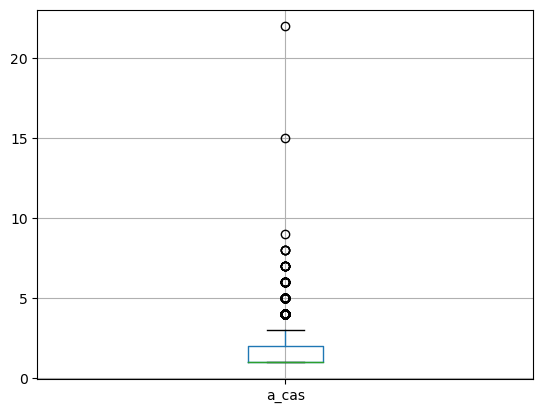

In [13]:
#boxplot of casualties
dfCol[['a_cas']].boxplot()

### As expected there are no Negative Casulties, but there is 2 dots that are outliers, at the 15 and 22/23(?) position

### We will keep this data as knowing the location of the most serious/hightest casulty colisions is of high importance

### Mapping values to decrease cognative Load
### (data guide @ https://admin.opendatani.gov.uk/dataset/police-recorded-injury-road-traffic-collision-statistics-northern-ireland-2017/resource/de8384e7-95c8-4e35-910b-ce919db78024 )

In [14]:
# Create a working copy
dfColCopy = dfCol.copy()

# District mapping
district_mapping = {
    'ARBC': 'Armagh Banbridge and Craigavon',
    'BELC': 'Belfast',
    'CCGL': 'Causeway Coast and Glens',
    'ANTN': 'Antrim and Newtownabbey',
    'ARND': 'Ards and North Down',
    'DAST': 'Derry and Strabane',
    'DCST': 'Derry and Strabane',  # Alternative code
    'FMOC': 'Fermanagh and Omagh',
    'FERO': 'Fermanagh and Omagh',  # Alternative code
    'LISC': 'Lisburn and Castlereagh',
    'MEAN': 'Mid and East Antrim',
    'MEUL': 'Mid Ulster',
    'MIDU': 'Mid Ulster',  # Alternative code
    'NEMD': 'Newry Mourne and Down',
    'NOBD': 'North Down and Ards'
}

# Severity mapping
severity_mapping = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

# Carriage way type mapping
a_ctype_map = {
    1: "Roundabout", 
    2: "One way street", 
    10: "Other / unknown",
    11:"Dual carriageway",
    12:"Motorway",
    13:"Single carriageway",
    14:"Slip road",
}

# Junction type mapping
a_jdet_map = {
    1: "Not at or within 20m of junction", 
    2: "Roundabout", 
    3: "Mini-roundabout",
    6:"Crossroads",
    8:"Multiple junction",
    9:"Slip road",
    10:"Private drive / entrance",
    11:"Other junction",
    12:"T or staggered junction"
}

# Weather mapping
a_weat_map = {
    1: "Fine without high winds", 
    2: "Raining without high winds", 
    3: "Snowing without high winds",
    4:"Fine with high winds",
    5:"Raining with high winds",
    6:"Snowing with high winds",
    7:"Fog or mist - if hazard",
    8:"Strong sun (glaring)",
    9:'Other','10':"Unknown"
}

# Light level mapping
a_light_map = {
    1: "Daylight: street lights present", 
    2: "Daylight: no street lighting", 
    3: "Daylight: street lighting unknown",
    4:"Darkness: street lights present and lit",
    5:"Darkness: street lights present but unlit",
    6:"Darkness: no street lighting",
    7:"Darkness: street lighting unknown",
}

# Road surface conditions mapping
a_roadsc_map = {
    1: "Dry", 
    2: "Wet / damp", 
    3: "Snow",
    4:"Frost / ice",
    5:"Flood",
    6:"Oil",
    7:"Mud",
    8:"Leaves",
    9:'Slippery (after dry spell)',
    10:"Other"
}

In [15]:
# Apply mappings
dfColCopy['District_Name'] = dfColCopy['a_District'].map(district_mapping)
dfColCopy['Severity'] = dfColCopy['a_type'].map(severity_mapping)
dfColCopy['Carriage_Type'] = dfColCopy['a_ctype'].map(a_ctype_map)
dfColCopy['Junction_Type'] = dfColCopy['a_jdet'].map(a_jdet_map)
dfColCopy['Weather'] = dfColCopy['a_weat'].map(a_weat_map)
dfColCopy['Light_Level'] = dfColCopy['a_light'].map(a_light_map)
dfColCopy['Road_Condition'] = dfColCopy['a_roadsc'].map(a_roadsc_map)

# Create datetime column
dfColCopy['datetime'] = pd.to_datetime(
    dfColCopy['a_year'].astype(str) + '-' + 
    dfColCopy['a_month'].astype(str) + '-' + 
    dfColCopy['a_day'].astype(str) + ' ' + 
    dfColCopy['a_hour'].astype(str) + ':' + 
    dfColCopy['a_min'].astype(str),
    format='%Y-%m-%d %H:%M'
)

# Add kmspeed column (convert mph to km/h)
dfColCopy['a_kmspeed'] = dfColCopy['a_speed'] * 1.60934

print(f"Cleaned CSV dataset shape: {dfCol.shape}")
print(f"\nSample of cleaned data:")
display(dfColCopy[['District_Name', 'Severity', 'a_cas', 'a_veh', 'datetime', 'Carriage_Type', 'Junction_Type', 'Weather', 'Light_Level', 'Road_Condition', 'a_kmspeed']].head())

Cleaned CSV dataset shape: (6081, 25)

Sample of cleaned data:


,District_Name,Severity,a_cas,a_veh,datetime,Carriage_Type,Junction_Type,Weather,Light_Level,Road_Condition,a_kmspeed
0,Newry Mourne and Down,Slight,1,1,2017-01-01 03:28:00,Single carriageway,NaN,NaN,NaN,NaN,96.5604
1,Mid and East Antrim,Slight,1,2,2017-01-01 03:37:00,Single carriageway,NaN,NaN,NaN,NaN,48.2802
2,Armagh Banbridge and Craigavon,Serious,1,1,2017-01-01 10:26:00,Single carriageway,NaN,Unknown,NaN,NaN,48.2802
3,Antrim and Newtownabbey,Slight,1,2,2017-01-01 10:56:00,Single carriageway,NaN,NaN,NaN,NaN,48.2802
4,Antrim and Newtownabbey,Serious,2,2,2017-01-01 11:57:00,Single carriageway,NaN,NaN,NaN,NaN,96.5604


In [16]:
# Convert GeoJSON features to DataFrame for mapping
collision_points = []
for feature in geojson_data['features']:
    props = feature['properties']
    coords = feature['geometry']['coordinates']
    
    # Create record with properties and coordinates
    record = props.copy()
    record['longitude'] = coords[0]
    record['latitude'] = coords[1]
    collision_points.append(record)

dfGeo = pd.DataFrame(collision_points)

# Apply same mappings to GeoJSON data
dfGeo['District_Name'] = dfGeo['a_District'].map(district_mapping)
dfGeo['Severity'] = dfGeo['a_type'].map(severity_mapping)

# Clean weather data (strip whitespace)
dfGeo['a_weat'] = dfGeo['a_weat'].astype(str).str.strip()

# Remove rows with missing coordinates
dfGeo = dfGeo.dropna(subset=['latitude', 'longitude'])

print(f"Created GeoJSON DataFrame with {len(dfGeo):,} collision points")
print(f"\nSample GeoJSON data:")
display(dfGeo[['District_Name', 'Severity', 'latitude', 'longitude', 'a_hour', 'a_weat']].head())

Created GeoJSON DataFrame with 6,081 collision points

Sample GeoJSON data:


,District_Name,Severity,latitude,longitude,a_hour,a_weat
0,Newry Mourne and Down,Slight,54.281742,-5.863640,3,
1,Mid and East Antrim,Slight,54.851131,-6.363452,3,
2,Armagh Banbridge and Craigavon,Serious,54.353228,-6.639651,10,10
3,Antrim and Newtownabbey,Slight,54.657811,-5.909253,10,
4,Antrim and Newtownabbey,Serious,54.743628,-6.235357,11,1


In [17]:
print("=" * 60)
print("SAFER STREETS NI - 2017 COLLISION ANALYSIS")
print("=" * 60)

print(f"\nTotal Collisions: {len(dfColCopy):,}")
print(f"Total Casualties: {dfColCopy['a_cas'].sum():,}")
print(f"\nCollisions by Severity:")
print(dfColCopy['Severity'].value_counts())

print(f"\nCollisions by District:")
print(dfColCopy['District_Name'].value_counts())

# Time analysis
print(f"\nCollisions by Day of Week:")
print(dfColCopy['a_wkday'].value_counts())

print(f"\nCollisions by Month:")
month_names = {
    1: 'Jan', 
    2: 'Feb', 
    3: 'Mar', 
    4: 'Apr', 
    5: 'May', 
    6: 'Jun',
    7: 'Jul', 
    8: 'Aug', 
    9: 'Sep', 
    10: 'Oct', 
    11: 'Nov', 
    12: 'Dec'
}

dfColCopy['Month_Name'] = dfColCopy['a_month'].map(month_names)
print(dfColCopy['Month_Name'].value_counts().sort_index())

SAFER STREETS NI - 2017 COLLISION ANALYSIS

Total Collisions: 6,081
Total Casualties: 9,184

Collisions by Severity:
Severity
Slight     5376
Serious     643
Fatal        62
Name: count, dtype: int64

Collisions by District:
District_Name
Belfast                           1478
Armagh Banbridge and Craigavon     601
Newry Mourne and Down              574
Lisburn and Castlereagh            525
Antrim and Newtownabbey            471
Derry and Strabane                 449
Mid Ulster                         436
Ards and North Down                430
Causeway Coast and Glens           407
Mid and East Antrim                390
Fermanagh and Omagh                320
Name: count, dtype: int64

Collisions by Day of Week:
a_wkday
FRI    1032
WED     979
THU     959
TUE     843
SAT     821
MON     798
SUN     649
Name: count, dtype: int64

Collisions by Month:
Month_Name
Apr    405
Aug    517
Dec    534
Feb    461
Jan    475
Jul    493
Jun    496
Mar    515
May    522
Nov    561
Oct    529
Sep   

In [18]:
# 1. District aggregations
district_stats = dfColCopy.groupby('District_Name').agg({
    'a_ref': 'count',
    'a_cas': 'sum',
    'a_type': lambda x: (x == 1).sum()
}).rename(columns={
    'a_ref': 'Total_Collisions',
    'a_cas': 'Total_Casualties',
    'a_type': 'Fatal_Collisions'
}).reset_index()

# 2. Severity breakdown by district
severity_by_district = dfColCopy.groupby(['District_Name', 'Severity']).size().reset_index(name='Count')

# 3. Temporal patterns
hourly_collisions = dfColCopy.groupby('a_hour').size().reset_index(name='Collisions')
monthly_collisions = dfColCopy.groupby('a_month').size().reset_index(name='Collisions')

month_names = {
    1: 'Jan', 
    2: 'Feb', 
    3: 'Mar', 
    4: 'Apr', 
    5: 'May', 
    6: 'Jun',
    7: 'Jul', 
    8: 'Aug', 
    9: 'Sep', 
    10: 'Oct', 
    11: 'Nov', 
    12: 'Dec'
}

monthly_collisions['Month'] = monthly_collisions['a_month'].map(month_names)

# 4. Day of week analysis
dow_collisions = dfColCopy.groupby('a_wkday').size().reset_index(name='Collisions')
dow_order = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
dow_collisions['a_wkday'] = pd.Categorical(dow_collisions['a_wkday'], categories=dow_order, ordered=True)
dow_collisions = dow_collisions.sort_values('a_wkday')

# 5. District center coordinates for reference
district_centers = {
    'Belfast': (54.5973, -5.9301),
    'Armagh Banbridge and Craigavon': (54.3520, -6.6530),
    'Causeway Coast and Glens': (55.1234, -6.6722),
    'Antrim and Newtownabbey': (54.7182, -6.2172),
    'Ards and North Down': (54.6021, -5.6980),
    'Derry and Strabane': (55.0090, -7.3598),
    'Fermanagh and Omagh': (54.4526, -7.6313),
    'Lisburn and Castlereagh': (54.5264, -6.0386),
    'Mid and East Antrim': (54.8638, -6.2766),
    'Mid Ulster': (54.5860, -6.7493),
    'Newry Mourne and Down': (54.1759, -6.3402)
}

# 6. Correlation matrix for analysis
numeric_cols = ['a_type', 'a_veh', 'a_cas', 'a_hour', 'a_month']
correlation_matrix = dfCol[numeric_cols].corr()

print("Visualization data prepared successfully!")
print(f"\nDistrict Statistics:")
display(district_stats)

Visualization data prepared successfully!

District Statistics:


,District_Name,Total_Collisions,Total_Casualties,Fatal_Collisions
0,Antrim and Newtownabbey,471,674,2
1,Ards and North Down,430,706,4
2,Armagh Banbridge and Craigavon,601,862,6
3,Belfast,1478,2143,3
4,Causeway Coast and Glens,407,648,6
5,Derry and Strabane,449,629,5
6,Fermanagh and Omagh,320,494,5
7,Lisburn and Castlereagh,525,848,7
8,Mid Ulster,436,659,5
9,Mid and East Antrim,390,597,6


## Vehicle Data
### Reading and Cleaning

In [19]:
# Read vehicle data
dfVeh = pd.read_csv('vehicle2017.csv')

print(f"Dataset Shape: {dfVeh.shape}")
print(f"\nColumns: {list(dfVeh.columns)}")
print(f"\nFirst few rows:")
display(dfVeh.head())

# Basic statistics
print(f"\nBasic Statistics:")
print(dfVeh.describe())

Dataset Shape: (11299, 17)

Columns: ['a_year', 'a_ref', 'v_id', 'v_type', 'v_tow', 'v_man', 'v_loc', 'v_junc', 'v_skid', 'v_hit', 'v_leave', 'v_hitoff', 'v_impact', 'v_sex', 'v_agegroup', 'v_hitr', 'v_forreg']

First few rows:


,a_year,a_ref,v_id,v_type,v_tow,v_man,v_loc,v_junc,v_skid,v_hit,v_leave,v_hitoff,v_impact,v_sex,v_agegroup,v_hitr,v_forreg
0,2017,1,1,8,1,18,3,,,,,,2,1,6,1,
1,2017,2,1,8,1,10,3,,,,,,3,1,7,1,
2,2017,2,2,8,1,18,3,,,,,,2,1,6,2,
3,2017,3,1,8,1,18,3,3,1,1,1,1,2,1,7,1,1
4,2017,4,1,8,1,18,3,,,,,,2,1,8,1,



Basic Statistics:
        a_year         a_ref          v_id        v_type         v_tow  \
count  11299.0  11299.000000  11299.000000  11299.000000  11299.000000   
mean    2017.0   3034.141251      1.537570      9.278343      1.055580   
std        0.0   1745.418394      0.665967      4.298122      0.447164   
min     2017.0      1.000000      1.000000      1.000000      1.000000   
25%     2017.0   1527.500000      1.000000      8.000000      1.000000   
50%     2017.0   3045.000000      1.000000      8.000000      1.000000   
75%     2017.0   4540.000000      2.000000      8.000000      1.000000   
max     2017.0   6081.000000      8.000000     25.000000      6.000000   

              v_man         v_loc      v_impact        v_hitr  
count  11299.000000  11299.000000  11299.000000  11299.000000  
mean      11.600584      3.182760      2.762811      1.064076  
std        6.467031      1.081458      1.069969      0.282807  
min        1.000000      1.000000      1.000000      1.000

In [20]:
dfVeh.dtypes

a_year         int64
a_ref          int64
v_id           int64
v_type         int64
v_tow          int64
v_man          int64
v_loc          int64
v_junc        object
v_skid        object
v_hit         object
v_leave       object
v_hitoff      object
v_impact       int64
v_sex         object
v_agegroup    object
v_hitr         int64
v_forreg      object
dtype: object

### We already checked for duplicate collisions
## adding NaN
### Step 1: Quantify Missingness

In [21]:
# Define the values to consider as missing
missing_values = [' ','', 'Unknown', np.nan]

# Iterate through each column and count missing values
for col in dfVeh.columns:
    if col in ['a_District','a_wkday']: continue
    missing_count = dfVeh[col].isin(missing_values).sum() + dfVeh[col].isna().sum()
    if missing_count > 0:
        print(f"Column '{col}': {missing_count} missing values")

Column 'v_junc': 10157 missing values
Column 'v_skid': 10157 missing values
Column 'v_hit': 10157 missing values
Column 'v_leave': 10157 missing values
Column 'v_hitoff': 10157 missing values
Column 'v_sex': 611 missing values
Column 'v_agegroup': 1 missing values
Column 'v_forreg': 10170 missing values


### 6 Columns are missing 10157 values (Nearly 90% of each of these columns is missing), this is substantial. There is also data missing from on sex of the driver and one instance of age of the driver

### Step 2: replace missing with NaN

In [22]:
missing_values = [' ','', 'Unknown', np.nan]
dfVeh.replace(missing_values, np.nan, inplace=True)
dfVeh.head(10)

,a_year,a_ref,v_id,v_type,v_tow,v_man,v_loc,v_junc,v_skid,v_hit,v_leave,v_hitoff,v_impact,v_sex,v_agegroup,v_hitr,v_forreg
0,2017,1,1,8,1,18,3,NaN,NaN,NaN,NaN,NaN,2,1,6,1,NaN
1,2017,2,1,8,1,10,3,NaN,NaN,NaN,NaN,NaN,3,1,7,1,NaN
2,2017,2,2,8,1,18,3,NaN,NaN,NaN,NaN,NaN,2,1,6,2,NaN
3,2017,3,1,8,1,18,3,3,1,1,1,1,2,1,7,1,1
4,2017,4,1,8,1,18,3,NaN,NaN,NaN,NaN,NaN,2,1,8,1,NaN
5,2017,4,2,8,1,2,3,NaN,NaN,NaN,NaN,NaN,4,NaN,9,1,NaN
6,2017,5,1,8,1,13,3,1,1,1,1,1,2,1,5,1,1
7,2017,5,2,8,1,3,6,1,1,1,1,1,2,1,5,1,1
8,2017,6,1,8,1,9,3,NaN,NaN,NaN,NaN,NaN,4,1,7,1,NaN
9,2017,6,2,8,1,13,3,NaN,NaN,NaN,NaN,NaN,2,1,8,1,NaN


In [23]:
v_type_map = {
    0: "Unknown", 
    1: "Pedal cycle",
    2:"Motorcycle - moped",
    4:"Motorcycle (under 125cc)", 
    5:"Motorcycle (125cc and above)",
    6:'Invalid vehicle / other 3 wheeler',
    7:"Car - taxi (hackney)",
    8:"Car",9:"Motor caravan", 
    14:"Other motor vehicle",
    15: "Goods 3.5 tonnes or less",
    16:"Goods exceeding 3.5 tonnes but less than 7.5 tonnes",
    17:"Goods 7.5 tonnes or over",18:"Car (used as taxi)",
    19:"Minibus (8-16 passengers)",20:"Bus or coach (17+ passengers)",
    21:"Ridden horse",
    22:"Other non motor vehicle",
    23:"Motorcycle (engine size unknown)",
    24:"Goods vehicle (gross weight unknown)",
    25:"Agricultural vehicle"
}

v_man_map = {
    1: "Reversing", 
    2: "Parked", 
    3: "About to go ahead - held up",
    4:"Slowing / stopping",
    5:"Moving off",
    6:"U-turn",
    7:"Turning left",
    8:"Waiting to turn left",
    9:"Turning right",
    10:"Waiting to turn right",
    11:"Changing lane to left",
    12:"Changing lane to right",
    13:"Overtaking moving vehicle on offside",
    14:"Overtaking stationary vehicle on offside",
    15:"Overtaking on nearside",
    16:"Going ahead left-hand bend",
    17:"Going ahead right-hand bend",
    18:"Going ahead other",
    19:"Other / not known"
}

v_impact_map = {
    1: "Did not impact", 
    2: "Front", 
    3: "Back",
    4:"Offside",
    5:"Nearside"
}

v_sex_map = {
    '1': "Male", 
    '2': "Female", 
    '3': "Unknown"
}

v_agegroup_map = {
    '1': "Under 10",
    '2': "10-16",
    '3': "17-24",
    '4': "25-34",
    '5': "35-44",
    '6': "45-54",
    '7': "55-64",
    '8':"65+",
    '9':"Unknown"
}

dfVeh['v_type'] = dfVeh['v_type'].replace(v_type_map)
dfVeh['v_man'] = dfVeh['v_man'].replace(v_man_map)
dfVeh['v_impact'] = dfVeh['v_impact'].replace(v_impact_map)
dfVeh['v_sex'] = dfVeh['v_sex'].replace(v_sex_map)
dfVeh['v_agegroup'] = dfVeh['v_agegroup'].replace(v_agegroup_map)
dfVeh.head(5)

,a_year,a_ref,v_id,v_type,v_tow,v_man,v_loc,v_junc,v_skid,v_hit,v_leave,v_hitoff,v_impact,v_sex,v_agegroup,v_hitr,v_forreg
0,2017,1,1,Car,1,Going ahead other,3,NaN,NaN,NaN,NaN,NaN,Front,Male,45-54,1,NaN
1,2017,2,1,Car,1,Waiting to turn right,3,NaN,NaN,NaN,NaN,NaN,Back,Male,55-64,1,NaN
2,2017,2,2,Car,1,Going ahead other,3,NaN,NaN,NaN,NaN,NaN,Front,Male,45-54,2,NaN
3,2017,3,1,Car,1,Going ahead other,3,3,1,1,1,1,Front,Male,55-64,1,1
4,2017,4,1,Car,1,Going ahead other,3,NaN,NaN,NaN,NaN,NaN,Front,Male,65+,1,NaN


## Casualty Data
### Reading and Cleaning

In [24]:
# Read casualty data
dfCas = pd.read_csv('casualty2017.csv')

print(f"Dataset Shape: {dfCas.shape}")
print(f"\nColumns: {list(dfCas.columns)}")
print(f"\nFirst few rows:")
display(dfCas.head())

# Basic statistics
print(f"\nBasic Statistics:")
print(dfCas.describe())

Dataset Shape: (9184, 14)

Columns: ['a_year', 'a_ref', 'v_id', 'c_id', 'c_class', 'c_sex', 'c_agegroup', 'c_sever', 'c_loc', 'c_move', 'c_school', 'c_pcv', 'c_pedinj', 'c_vtype']

First few rows:


,a_year,a_ref,v_id,c_id,c_class,c_sex,c_agegroup,c_sever,c_loc,c_move,c_school,c_pcv,c_pedinj,c_vtype
0,2017,1,1,1,1,1,6,3,,,8,,,8
1,2017,2,1,1,1,1,7,3,,,8,,,8
2,2017,3,0,1,5,1,8,2,6,6,8,1,2,
3,2017,4,1,1,1,1,8,3,,,8,,,8
4,2017,5,1,1,1,1,5,2,1,1,8,1,,8



Basic Statistics:
       a_year        a_ref         v_id         c_id      c_class  \
count  9184.0  9184.000000  9184.000000  9184.000000  9184.000000   
mean   2017.0  3003.359865     1.329377     1.578179     2.357796   
std       0.0  1751.001404     0.699764     1.157332     1.765345   
min    2017.0     1.000000     0.000000     1.000000     1.000000   
25%    2017.0  1469.750000     1.000000     1.000000     1.000000   
50%    2017.0  3009.500000     1.000000     1.000000     1.000000   
75%    2017.0  4518.250000     2.000000     2.000000     4.000000   
max    2017.0  6081.000000     6.000000    22.000000     7.000000   

             c_sex   c_agegroup      c_sever     c_school  
count  9184.000000  9184.000000  9184.000000  9184.000000  
mean      1.471908     4.667792     2.901568     7.989329  
std       0.499673     1.892558     0.320115     0.102752  
min       1.000000     1.000000     1.000000     7.000000  
25%       1.000000     3.000000     3.000000     8.000000  

In [25]:
dfVeh.dtypes

a_year         int64
a_ref          int64
v_id           int64
v_type        object
v_tow          int64
v_man         object
v_loc          int64
v_junc        object
v_skid        object
v_hit         object
v_leave       object
v_hitoff      object
v_impact      object
v_sex         object
v_agegroup    object
v_hitr         int64
v_forreg      object
dtype: object

## adding NaN
### Step 1: Quantify Missingness

In [26]:
# Define the values to consider as missing
missing_values = [' ','', 'Unknown', np.nan]

# Iterate through each column and count missing values
for col in dfCas.columns:
    if col in ['a_District','a_wkday']: continue
    missing_count = dfCas[col].isin(missing_values).sum() + dfCas[col].isna().sum()
    if missing_count > 0:
        print(f"Column '{col}': {missing_count} missing values")

Column 'c_loc': 7951 missing values
Column 'c_move': 7951 missing values
Column 'c_pcv': 7951 missing values
Column 'c_pedinj': 8923 missing values
Column 'c_vtype': 729 missing values


### 5 Columns are missing values (Over 97% of Pedestrain Injuries On the Road Work is missing, with 3 Columns missing (with rounding) 87%).
### Step 2: replace missing with NaN

In [27]:
missing_values = [' ','', 'Unknown', np.nan]
dfCas.replace(missing_values, np.nan, inplace=True)
dfCas.head(10)

,a_year,a_ref,v_id,c_id,c_class,c_sex,c_agegroup,c_sever,c_loc,c_move,c_school,c_pcv,c_pedinj,c_vtype
0,2017,1,1,1,1,1,6,3,NaN,NaN,8,NaN,NaN,8
1,2017,2,1,1,1,1,7,3,NaN,NaN,8,NaN,NaN,8
2,2017,3,0,1,5,1,8,2,6,6,8,1,2,NaN
3,2017,4,1,1,1,1,8,3,NaN,NaN,8,NaN,NaN,8
4,2017,5,1,1,1,1,5,2,1,1,8,1,NaN,8
5,2017,5,2,2,1,1,5,2,1,1,8,1,NaN,8
6,2017,6,1,1,1,1,7,3,NaN,NaN,8,NaN,NaN,8
7,2017,6,1,2,4,2,5,3,NaN,NaN,8,NaN,NaN,8
8,2017,6,2,3,1,1,8,3,NaN,NaN,8,NaN,NaN,8
9,2017,6,2,4,3,2,7,3,NaN,NaN,8,NaN,NaN,8


In [28]:
c_class_map = {
    1: "Driver",
    2: "Pillion passenger",
    3: "Vehicle passenger - front",
    4: "Vehicle passenger - rear", 
    5: "Pedestrian",
    6: "Motorcyclist",
    7: "Pedal cyclist"
}

c_sex_map = {
    1: "Male", 
    2: "Female", 
    3: "Unknown"
}

c_agegroup_map = {
    1: "Under 10",
    2: "10-16",
    3: "17-24",
    4: "25-34",
    5: "35-44",
    6: "45-54",
    7: "55-64",
    8: "65+",
    9: "Unknown"
}

c_sever_map = {
    1: "Fatal", 
    2: "Serious", 
    3: "Slight",
}

c_pcv_map = {
    1: "Not a bus or coach passenger", 
    2: "Boarding", 
    3: "Alighting",
    4: "Standing passenger",
    5: "Seated passenger"
}

c_vtype_map = {
    1: "Pedal cycle",
    2: "Motorcycle - moped",
    4: "Motorcycle (under 125cc)", 
    5: "Motorcycle (125cc and above)",
    6: "Invalid vehicle / other 3 wheeler",
    7: "Car - taxi (hackney)",
    8: "Car",
    9: "Motor caravan", 
    14: "Other motor vehicle",
    15: "Goods 3.5 tonnes or less",
    16: "Goods exceeding 3.5 tonnes but less than 7.5 tonnes",
    17: "Goods 7.5 tonnes or over",
    18: "Car (used as taxi)",
    19: "Minibus (8-16 passengers)",
    20: "Bus or coach (17+ passengers)",
    21: "Ridden horse",
    22: "Other non motor vehicle",
    23: "Motorcycle (engine size unknown)",
    24: "Goods vehicle (gross weight unknown)",
    25: "Agricultural vehicle"
}

dfCas['c_class'] = dfCas['c_class'].replace(c_class_map)
dfCas['c_sex'] = dfCas['c_sex'].replace(c_sex_map)
dfCas['c_agegroup'] = dfCas['c_agegroup'].replace(c_agegroup_map)
dfCas['c_sever'] = dfCas['c_sever'].replace(c_sever_map)
dfCas['c_pcv'] = dfCas['c_pcv'].replace(c_pcv_map)
dfCas['c_vtype'] = dfCas['c_vtype'].replace(c_vtype_map)
dfCas.head(5)

,a_year,a_ref,v_id,c_id,c_class,c_sex,c_agegroup,c_sever,c_loc,c_move,c_school,c_pcv,c_pedinj,c_vtype
0,2017,1,1,1,Driver,Male,45-54,Slight,NaN,NaN,8,NaN,NaN,8
1,2017,2,1,1,Driver,Male,55-64,Slight,NaN,NaN,8,NaN,NaN,8
2,2017,3,0,1,Pedestrian,Male,65+,Serious,6,6,8,1,2,NaN
3,2017,4,1,1,Driver,Male,65+,Slight,NaN,NaN,8,NaN,NaN,8
4,2017,5,1,1,Driver,Male,35-44,Serious,1,1,8,1,NaN,8


## EDA

In [29]:
# the below will show the mean cars in an accident as well as how much variaration there is
# this will also be shown for the causilty reports and the speed as well 
dfCol[['a_veh','a_cas','a_speed']].describe()

,a_veh,a_cas,a_speed
count,6081.000000,6081.000000,6081.000000
mean,1.858083,1.510278,43.146686
std,0.635119,0.987888,14.741820
min,1.000000,1.000000,10.000000
25%,1.000000,1.000000,30.000000
50%,2.000000,1.000000,30.000000
75%,2.000000,2.000000,60.000000
max,8.000000,22.000000,70.000000


### Most severe accidents

In [30]:
dfCol[dfCol["a_cas"]>7].head(10)

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
757,2017,758,BELC,2,2,8,SAT,18,2,11,...,12,7,1,1,1,1,2,1,1,1
1476,2017,1477,CCGL,2,3,15,MON,3,4,12,...,12,7,1,1,1,1,1,1,1,1
2719,2017,2720,CCGL,3,4,9,THU,22,6,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4699,2017,4700,LISC,3,2,8,SUN,15,10,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5141,2017,5142,BELC,3,2,8,SAT,11,11,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5666,2017,5667,BELC,3,2,22,WED,6,12,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6008,2017,6009,BELC,3,4,8,TUE,26,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# order by casulties and then number of veichles 
dfCol.sort_values(by=["a_cas","a_veh"],ascending=False).head()

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
5666,2017,5667,BELC,3,2,22,WED,6,12,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1476,2017,1477,CCGL,2,3,15,MON,3,4,12,...,12,7,1,1,1,1,1,1,1,1
2719,2017,2720,CCGL,3,4,9,THU,22,6,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6008,2017,6009,BELC,3,4,8,TUE,26,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,2017,758,BELC,2,2,8,SAT,18,2,11,...,12,7,1,1,1,1,2,1,1,1


In [32]:
dfColCopy[["a_speed","a_kmspeed"]].value_counts(normalize=True)

a_speed  a_kmspeed
30       48.2802      0.498931
60       96.5604      0.339747
40       64.3736      0.081730
70       112.6538     0.038645
50       80.4670      0.033218
20       32.1868      0.007236
10       16.0934      0.000329
65       104.6071     0.000164
Name: proportion, dtype: float64

### 6 and 7 vehicle collisions where the least likely
### almost half of all colisions where on roads with a 30mph speed limit

### Vehicle Data

In [33]:
dfVeh.describe(include='all')

,a_year,a_ref,v_id,v_type,v_tow,v_man,v_loc,v_junc,v_skid,v_hit,v_leave,v_hitoff,v_impact,v_sex,v_agegroup,v_hitr,v_forreg
count,11299.0,11299.000000,11299.000000,11299,11299.000000,11299,11299.000000,1142,1142,1142,1142,1142,11299,10688,11298,11299.000000,1129
unique,NaN,NaN,NaN,17,NaN,19,NaN,7,6,10,9,10,5,2,9,NaN,4
top,NaN,NaN,NaN,Car,NaN,Going ahead other,NaN,1,1,1,1,1,Front,Male,25-34,NaN,1
freq,NaN,NaN,NaN,9397,NaN,4027,NaN,539,884,1097,881,921,5818,6697,2509,NaN,1088
mean,2017.0,3034.141251,1.537570,NaN,1.055580,NaN,3.182760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.064076,NaN
std,0.0,1745.418394,0.665967,NaN,0.447164,NaN,1.081458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282807,NaN
min,2017.0,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,2017.0,1527.500000,1.000000,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,2017.0,3045.000000,1.000000,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,2017.0,4540.000000,2.000000,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [34]:
print(dfVeh["v_sex"].value_counts())
dfVeh[["v_sex","v_impact"]].value_counts(normalize=True)

v_sex
Male      6697
Female    3991
Name: count, dtype: int64


v_sex   v_impact      
Male    Front             0.334862
Female  Front             0.184225
Male    Back              0.123503
Female  Back              0.099177
Male    Offside           0.081400
        Nearside          0.067833
Female  Offside           0.044723
        Nearside          0.038548
Male    Did not impact    0.018993
Female  Did not impact    0.006737
Name: proportion, dtype: float64

### Men are drivers in 62% of cars involved in colisions

In [35]:
dfVeh.groupby("v_man")[["v_agegroup"]].value_counts() 

v_man                        v_agegroup
About to go ahead - held up  25-34         231
                             35-44         205
                             45-54         184
                             17-24         121
                             55-64         104
                                          ... 
Waiting to turn right        45-54          53
                             17-24          31
                             55-64          29
                             65+            17
                             10-16           1
Name: count, Length: 147, dtype: int64

In [36]:
dfVeh["v_type"].value_counts(normalize=True)

v_type
Car                                                    0.831667
Goods 3.5 tonnes or less                               0.057173
Pedal cycle                                            0.028587
Motorcycle (engine size unknown)                       0.023807
Goods vehicle (gross weight unknown)                   0.020798
Bus or coach (17+ passengers)                          0.011063
Car (used as taxi)                                     0.008585
Agricultural vehicle                                   0.007788
Other motor vehicle                                    0.003806
Motorcycle - moped                                     0.001859
Minibus (8-16 passengers)                              0.001770
Car - taxi (hackney)                                   0.001505
Invalid vehicle / other 3 wheeler                      0.000443
Motor caravan                                          0.000443
Other non motor vehicle                                0.000266
Goods exceeding 3.5 tonnes but le

### 83% of vehicles where cars

## Casualty Data

In [37]:
dfCas.describe(include='all')

,a_year,a_ref,v_id,c_id,c_class,c_sex,c_agegroup,c_sever,c_loc,c_move,c_school,c_pcv,c_pedinj,c_vtype
count,9184.0,9184.000000,9184.000000,9184.000000,9184,9184,9184,9184,1233,1233,9184.000000,1233,261,8455
unique,NaN,NaN,NaN,NaN,7,3,9,3,8,10,NaN,4,2,20
top,NaN,NaN,NaN,NaN,Driver,Male,25-34,Slight,1,1,NaN,1,2,8
freq,NaN,NaN,NaN,NaN,5224,4852,1951,8343,1035,1035,NaN,1213,255,7176
mean,2017.0,3003.359865,1.329377,1.578179,NaN,NaN,NaN,NaN,NaN,NaN,7.989329,NaN,NaN,NaN
std,0.0,1751.001404,0.699764,1.157332,NaN,NaN,NaN,NaN,NaN,NaN,0.102752,NaN,NaN,NaN
min,2017.0,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
25%,2017.0,1469.750000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
50%,2017.0,3009.500000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
75%,2017.0,4518.250000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [38]:
# Show the accidents that where fatal
dfCas[dfCas["c_sever"] == ("Fatal")].head(10)

,a_year,a_ref,v_id,c_id,c_class,c_sex,c_agegroup,c_sever,c_loc,c_move,c_school,c_pcv,c_pedinj,c_vtype
208,2017,133,1,1,Driver,Male,17-24,Fatal,1,1,8,1,NaN,8
478,2017,309,1,1,Driver,Male,25-34,Fatal,1,1,8,1,NaN,8
563,2017,363,1,1,Motorcyclist,Male,45-54,Fatal,1,1,8,1,NaN,5
640,2017,412,1,1,Driver,Male,45-54,Fatal,1,1,8,1,NaN,8
720,2017,468,0,2,Pedestrian,Female,65+,Fatal,6,4,8,1,2,NaN
988,2017,639,1,3,Vehicle passenger - rear,Female,65+,Fatal,1,1,8,1,NaN,8
1047,2017,673,0,1,Pedestrian,Female,45-54,Fatal,6,4,8,1,2,NaN
1258,2017,810,0,1,Pedestrian,Male,55-64,Fatal,7,10,8,1,2,NaN
1667,2017,1065,1,1,Driver,Male,65+,Fatal,1,1,8,1,NaN,8
1892,2017,1217,1,1,Driver,Male,45-54,Fatal,1,1,8,1,NaN,8


In [39]:
### class of casualty 
dfCas["c_class"].value_counts()

c_class
Driver                       5224
Vehicle passenger - front    1614
Vehicle passenger - rear     1009
Pedestrian                    729
Pedal cyclist                 319
Motorcyclist                  274
Pillion passenger              15
Name: count, dtype: int64

## Build the dashboard

In [40]:
# Create the Dash application
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

colors = {
    'background': '#f8f9fa',
    'text': '#2c3e50',
    'primary': '#3498db',
    'danger': '#e74c3c',
    'warning': '#f39c12',
    'success': '#27ae60'
}

# Dashboard Layout
app.layout = html.Div([
    # Header
    html.Div([
        html.H1('Safer Streets NI Dashboard',
                style={'textAlign': 'center', 'color': colors['text'], 'marginBottom': 10}),
        html.H3('2017 Road Traffic Collision Analysis - Individual Collision Mapping',
                style={'textAlign': 'center', 'color': colors['primary'], 'marginTop': 0}),
        html.P('Team Barchart | Data Source: PSNI Road Policing',
               style={'textAlign': 'center', 'color': '#7f8c8d'}),
    ], style={'backgroundColor': colors['background'], 'padding': '20px'}),

    # Key Metrics Cards
    html.Div([
        html.Div([
            html.H4(f"{len(dfColCopy):,}", style={'color': colors['primary'], 'marginBottom': 5}),
            html.P('Total Collisions', style={'margin': 0})
        ], style={'textAlign': 'center', 'padding': '20px', 'backgroundColor': 'white',
                  'borderRadius': '5px', 'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)',
                  'flex': '1', 'margin': '10px'}),

        html.Div([
            html.H4(f"{dfColCopy['a_cas'].sum():,}", style={'color': colors['warning'], 'marginBottom': 5}),
            html.P('Total Casualties', style={'margin': 0})
        ], style={'textAlign': 'center', 'padding': '20px', 'backgroundColor': 'white',
                  'borderRadius': '5px', 'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)',
                  'flex': '1', 'margin': '10px'}),

        html.Div([
            html.H4(f"{(dfColCopy['a_type'] == 1).sum()}", style={'color': colors['danger'], 'marginBottom': 5}),
            html.P('Fatal Collisions', style={'margin': 0})
        ], style={'textAlign': 'center', 'padding': '20px', 'backgroundColor': 'white',
                  'borderRadius': '5px', 'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)',
                  'flex': '1', 'margin': '10px'}),

        html.Div([
            html.H4(f"{len(dfColCopy['District_Name'].unique())}", style={'color': colors['success'], 'marginBottom': 5}),
            html.P('Districts Covered', style={'margin': 0})
        ], style={'textAlign': 'center', 'padding': '20px', 'backgroundColor': 'white',
                  'borderRadius': '5px', 'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)',
                  'flex': '1', 'margin': '10px'}),
    ], style={'display': 'flex', 'flexWrap': 'wrap', 'justifyContent': 'space-around',
              'margin': '20px', 'padding': '10px'}),

    # Tabs for different visualizations
    dcc.Tabs(id='tabs', value='overview-tab', children=[
        dcc.Tab(label='📊 Overview', value='overview-tab'),
        dcc.Tab(label='🗺️ Geographic Analysis', value='geo-tab'),
        dcc.Tab(label='⏰ Temporal Patterns', value='time-tab'),
        dcc.Tab(label='📈 District Comparison', value='district-tab'),
        dcc.Tab(label='🔗 Correlation Analysis', value='correlation-tab'),
    ], style={'marginTop': '20px'}),

    html.Div(id='tab-content', style={'padding': '20px'})
], style={'fontFamily': 'Arial, sans-serif', 'backgroundColor': colors['background']})

print("Dashboard layout created successfully!")

Dashboard layout created successfully!


In [41]:
# Main callback for tab content
@app.callback(
    Output('tab-content', 'children'),
    Input('tabs', 'value')
)
def render_content(tab):
    if tab == 'overview-tab':
        # Overview Tab
        # Collision Charts
        fig_severity = px.pie(
            dfColCopy,
            names='Severity',
            title='Collision Distribution by Severity',
            color='Severity',
            color_discrete_map={'Fatal': colors['danger'],
                                'Serious': colors['warning'],
                                'Slight': colors['success']},
            hole=0.3
        )
        fig_severity.update_layout(height=400)

        fig_vehicles = px.histogram(
            dfColCopy,
            x='a_veh',
            title='Number of Vehicles Involved in Collisions',
            labels={'a_veh': 'Number of Vehicles', 'count': 'Frequency'},
            nbins=10,
            color_discrete_sequence=[colors['primary']]
        )
        fig_vehicles.update_layout(height=400)

        # Vehicle Type Analysis (already mapped in dfVeh)
        vehicle_type_counts = dfVeh['v_type'].value_counts().head(10)
        
        fig_vehicle_types = px.bar(
            x=vehicle_type_counts.values,
            y=vehicle_type_counts.index,
            orientation='h',
            title='Top 10 Vehicle Types in Collisions',
            labels={'x': 'Count', 'y': 'Vehicle Type'},
            color=vehicle_type_counts.values,
            color_continuous_scale='Blues'
        )
        fig_vehicle_types.update_layout(height=400, showlegend=False)
    
        # Casualty Class (already mapped in dfCas)
        casualty_class_counts = dfCas['c_class'].value_counts()
        
        fig_casualty_class = px.pie(
            names=casualty_class_counts.index,
            values=casualty_class_counts.values,
            title='Casualties by Road User Type',
            hole=0.3
        )
        fig_casualty_class.update_layout(height=400)
    
        # Casualty Severity (already mapped in dfCas)
        casualty_severity_counts = dfCas['c_sever'].value_counts()
        
        fig_casualty_severity = px.bar(
            x=casualty_severity_counts.values,
            y=casualty_severity_counts.index,
            orientation='h',
            title='Casualty Severity Distribution',
            labels={'x': 'Count', 'y': 'Severity'},
            color=casualty_severity_counts.index,
            color_discrete_map={
                'Fatal': colors['danger'],
                'Serious': colors['warning'],
                'Slight': colors['success']
            }
        )
        fig_casualty_severity.update_layout(height=400, showlegend=False)

        
        agegroup_counts = dfCas['c_agegroup'].value_counts()
        
        # Define the correct order for age groups
        age_order = ['Under 10', '10-16', '17-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Unknown']
        
        # Reorder the data
        agegroup_df = pd.DataFrame({
            'Age Group': agegroup_counts.index,
            'Count': agegroup_counts.values
        })
        
        fig_age_dist = px.bar(
            agegroup_df,
            x='Age Group',
            y='Count',
            title='Age Group Distribution of Casualties',
            labels={'Age Group': 'Age Group', 'Count': 'Number of Casualties'},
            color='Count',
            color_continuous_scale='Blues',
            category_orders={'Age Group': age_order}
        )
        fig_age_dist.update_layout(height=400, showlegend=False)
    
        # Gender Distribution (already mapped in dfCas)
        gender_counts = dfCas['c_sex'].value_counts()
        
        fig_gender = px.pie(
            names=gender_counts.index,
            values=gender_counts.values,
            title='Gender Distribution of Casualties',
            hole=0.3
        )
        fig_gender.update_layout(height=400)

        # Layout
        return html.Div([
            html.H3('Collision Overview', style={'color': colors['text'], 'marginTop': '20px'}),
            html.Div([
                html.Div([dcc.Graph(figure=fig_severity)], style={'flex': '1', 'padding': '10px'}),
                html.Div([dcc.Graph(figure=fig_vehicles)], style={'flex': '1', 'padding': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap'}),
            
            html.Hr(),
            html.H3('Vehicle Analysis', style={'color': colors['text'], 'marginTop': '20px'}),
            html.Div([
                dcc.Graph(figure=fig_vehicle_types)
            ], style={'padding': '10px'}),
            
            html.Hr(),
            html.H3('Casualty Analysis', style={'color': colors['text'], 'marginTop': '20px'}),
            html.Div([
                html.Div([dcc.Graph(figure=fig_casualty_class)], style={'flex': '1', 'padding': '10px'}),
                html.Div([dcc.Graph(figure=fig_casualty_severity)], style={'flex': '1', 'padding': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap'}),
            
            html.Div([
                html.Div([dcc.Graph(figure=fig_age_dist)], style={'flex': '1', 'padding': '10px'}),
                html.Div([dcc.Graph(figure=fig_gender)], style={'flex': '1', 'padding': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap'}),
        ])

    elif tab == 'geo-tab':
        # Geographic Analysis Tab
        return html.Div([
            html.H3('Individual Collision Point Mapping', style={'color': colors['text'], 'marginBottom': '20px'}),
            
            # Filter Controls
            html.Div([
                html.Div([
                    html.Label('Time of Day:', style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                    dcc.Dropdown(
                        id='time-filter',
                        options=[
                            {'label': 'All Times', 'value': 'all'},
                            {'label': 'Morning (6-11)', 'value': 'morning'},
                            {'label': 'Afternoon (12-17)', 'value': 'afternoon'},
                            {'label': 'Evening (18-23)', 'value': 'evening'},
                            {'label': 'Night (0-5)', 'value': 'night'}
                        ],
                        value='all',
                        clearable=False,
                        style={'width': '100%'}
                    )
                ], style={'flex': '1', 'padding': '10px'}),
                
                html.Div([
                    html.Label('Severity:', style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                    dcc.Dropdown(
                        id='severity-filter',
                        options=[
                            {'label': 'All Severities', 'value': 'all'},
                            {'label': 'Fatal', 'value': 'Fatal'},
                            {'label': 'Serious', 'value': 'Serious'},
                            {'label': 'Slight', 'value': 'Slight'}
                        ],
                        value='all',
                        clearable=False,
                        style={'width': '100%'}
                    )
                ], style={'flex': '1', 'padding': '10px'}),
                
                html.Div([
                    html.Label('Weather:', style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                    dcc.Dropdown(
                        id='weather-filter',
                        options=[
                            {'label': 'All Weather', 'value': 'all'},
                            {'label': 'Fine (No Wind)', 'value': '1'},
                            {'label': 'Raining (No Wind)', 'value': '2'},
                            {'label': 'Snowing (No Wind)', 'value': '3'},
                            {'label': 'Fine + Wind', 'value': '4'},
                            {'label': 'Raining + Wind', 'value': '5'},
                            {'label': 'Snowing + Wind', 'value': '6'},
                            {'label': 'Fog/Mist', 'value': '7'},
                            {'label': 'Other', 'value': '8'},
                            {'label': 'Unknown', 'value': '9'}
                        ],
                        value='all',
                        clearable=False,
                        style={'width': '100%'}
                    )
                ], style={'flex': '1', 'padding': '10px'}),
                
                html.Div([
                    html.Label('District:', style={'fontWeight': 'bold', 'marginBottom': '5px'}),
                    dcc.Dropdown(
                        id='district-filter',
                        options=[{'label': 'All Districts', 'value': 'all'}] + 
                                [{'label': dist, 'value': dist} for dist in sorted(dfGeo['District_Name'].dropna().unique())],
                        value='all',
                        clearable=False,
                        style={'width': '100%'}
                    )
                ], style={'flex': '1', 'padding': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap', 'backgroundColor': 'white',
                      'padding': '15px', 'borderRadius': '5px', 'marginBottom': '20px',
                      'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)'}),
            
            html.Div(id='map-summary-stats', style={'marginBottom': '20px'}),
            dcc.Graph(id='filtered-map', style={'height': '700px'}),
            html.Hr(),
            dcc.Graph(id='filtered-district-bar')
        ])

    elif tab == 'time-tab':
        # Temporal Patterns Tab
        fig_hourly = px.line(
            hourly_collisions,
            x='a_hour',
            y='Collisions',
            title='Collision Patterns by Hour of Day',
            labels={'a_hour': 'Hour of Day', 'Collisions': 'Number of Collisions'},
            markers=True
        )
        fig_hourly.update_layout(height=400)
        fig_hourly.update_traces(line_color=colors['primary'], line_width=3)

        fig_monthly = px.bar(
            monthly_collisions,
            x='Month',
            y='Collisions',
            title='Monthly Collision Distribution',
            labels={'Collisions': 'Number of Collisions'},
            color='Collisions',
            color_continuous_scale='Viridis'
        )
        fig_monthly.update_layout(height=400, showlegend=False)

        fig_dow = px.bar(
            dow_collisions,
            x='a_wkday',
            y='Collisions',
            title='Collisions by Day of Week',
            labels={'a_wkday': 'Day of Week', 'Collisions': 'Number of Collisions'},
            color='Collisions',
            color_continuous_scale='RdYlGn_r'
        )
        fig_dow.update_layout(height=400, showlegend=False)

        return html.Div([
            dcc.Graph(figure=fig_hourly),
            html.Div([
                html.Div([dcc.Graph(figure=fig_monthly)], style={'flex': '1', 'padding': '10px'}),
                html.Div([dcc.Graph(figure=fig_dow)], style={'flex': '1', 'padding': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap'})
        ])

    elif tab == 'district-tab':
        # District Comparison Tab
        fig_severity_district = px.bar(
            severity_by_district,
            x='District_Name',
            y='Count',
            color='Severity',
            title='Collision Severity Breakdown by District',
            labels={'Count': 'Number of Collisions', 'District_Name': 'District'},
            color_discrete_map={'Fatal': colors['danger'],
                                'Serious': colors['warning'],
                                'Slight': colors['success']},
            barmode='group'
        )
        fig_severity_district.update_layout(height=500, xaxis_tickangle=-45)

        fig_casualties = px.scatter(
            district_stats,
            x='Total_Collisions',
            y='Total_Casualties',
            size='Fatal_Collisions',
            hover_name='District_Name',
            title='Collision vs Casualties Relationship (Bubble size = Fatal Collisions)',
            labels={'Total_Collisions': 'Total Collisions', 'Total_Casualties': 'Total Casualties'},
            trendline='ols'
        )
        fig_casualties.update_layout(height=500)

        return html.Div([
            dcc.Graph(figure=fig_severity_district),
            html.Hr(),
            dcc.Graph(figure=fig_casualties)
        ])
    
    elif tab == 'correlation-tab':
        # Correlation Analysis Tab
        var_name_mapping = {
            'a_type': 'Severity Type',
            'a_veh': 'Number of Vehicles',
            'a_cas': 'Number of Casualties',
            'a_hour': 'Hour of Day',
            'a_month': 'Month'
        }
        
        fig_heatmap = px.imshow(
            correlation_matrix,
            labels=dict(x="Variable", y="Variable", color="Correlation"),
            x=[var_name_mapping.get(col, col) for col in numeric_cols],
            y=[var_name_mapping.get(col, col) for col in numeric_cols],
            color_continuous_scale='Blues',
            title='Correlation Matrix Heatmap',
            text_auto='.2f',
            aspect="auto"
        )
        fig_heatmap.update_xaxes(side="bottom")
        fig_heatmap.update_layout(height=600, width=700)
        
        return html.Div([
            html.Div([dcc.Graph(figure=fig_heatmap)], style={'marginBottom': '30px'}),
            html.Hr(),
            html.Div([
                html.H3('Interactive Correlation Explorer', style={'color': colors['text'], 'marginTop': '20px'}),
                html.P('Select a variable to see its correlation with all other variables:',
                       style={'color': '#7f8c8d', 'marginBottom': '15px'}),
                html.Label('Select Variable:', style={'fontWeight': 'bold', 'marginBottom': '10px'}),
                dcc.Dropdown(
                    id='correlation-dropdown',
                    options=[{'label': var_name_mapping.get(col, col), 'value': col} 
                             for col in numeric_cols],
                    value='a_cas',
                    style={'width': '50%', 'marginBottom': '20px'}
                ),
                dcc.Graph(id='correlation-graph')
            ], style={'backgroundColor': 'white', 'padding': '20px', 'borderRadius': '5px',
                      'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)'})
        ])

print("Main callback defined successfully!")

Main callback defined successfully!


In [42]:
# Callback for filtered map
@app.callback(
    [Output('filtered-map', 'figure'),
     Output('filtered-district-bar', 'figure'),
     Output('map-summary-stats', 'children')],
    [Input('time-filter', 'value'),
     Input('severity-filter', 'value'),
     Input('weather-filter', 'value'),
     Input('district-filter', 'value')]
)
def update_map(time_period, severity, weather, district):
    # Use GeoJSON data for individual collision points
    filtered_df = dfGeo.copy()
    
    # Time Filter
    if time_period != 'all':
        if time_period == 'morning':
            filtered_df = filtered_df[(filtered_df['a_hour'] >= 6) & (filtered_df['a_hour'] <= 11)]
        elif time_period == 'afternoon':
            filtered_df = filtered_df[(filtered_df['a_hour'] >= 12) & (filtered_df['a_hour'] <= 17)]
        elif time_period == 'evening':
            filtered_df = filtered_df[(filtered_df['a_hour'] >= 18) & (filtered_df['a_hour'] <= 23)]
        elif time_period == 'night':
            filtered_df = filtered_df[(filtered_df['a_hour'] >= 0) & (filtered_df['a_hour'] <= 5)]
    
    # Severity Filter
    if severity != 'all':
        filtered_df = filtered_df[filtered_df['Severity'] == severity]
    
    # Weather Filter
    if weather != 'all':
        filtered_df = filtered_df[filtered_df['a_weat'] == weather]
    
    # District Filter
    if district != 'all':
        filtered_df = filtered_df[filtered_df['District_Name'] == district]
    
    # Create map with individual collision points
    if len(filtered_df) > 0:
        # Sample if too many points (for performance)
        if len(filtered_df) > 2000:
            display_df = filtered_df.sample(n=6081, random_state=42)
            title_suffix = f" (showing 6081 of {len(filtered_df):,} collisions)"
        else:
            display_df = filtered_df
            title_suffix = f" ({len(filtered_df):,} collisions)"
        
        fig_map = px.scatter_map(
            display_df,
            lat='latitude',
            lon='longitude',
            color='Severity',
            hover_data={
                'District_Name': True,
                'a_hour': True,
                'a_weat': True,
                'a_veh': True,
                'latitude': False,
                'longitude': False
            },
            title=f'Individual Collision Locations{title_suffix}',
            color_discrete_map={
                'Fatal': colors['danger'],
                'Serious': colors['warning'],
                'Slight': colors['success']
            },
            zoom=7,
            opacity=0.7,
            size_max=8
        )
        fig_map.update_layout(
            mapbox_style='carto-positron',
            height=700,
            margin={'r': 0, 't': 40, 'l': 0, 'b': 0}
        )
    else:
        fig_map = go.Figure()
        fig_map.update_layout(title='No data matches the selected filters', height=700)
    
    # Recalculate district statistics for bar chart
    filtered_district_stats = filtered_df.groupby('District_Name').agg({
        'a_ref': 'count',
        'a_cas': 'sum',
        'a_type': lambda x: (x == 1).sum()
    }).rename(columns={
        'a_ref': 'Total_Collisions',
        'a_cas': 'Total_Casualties',
        'a_type': 'Fatal_Collisions'
    }).reset_index()
    
    # Create bar chart
    if len(filtered_district_stats) > 0:
        fig_bar = px.bar(
            filtered_district_stats.sort_values('Total_Collisions', ascending=True),
            x='Total_Collisions',
            y='District_Name',
            orientation='h',
            title='Total Collisions by District (Filtered)',
            labels={'Total_Collisions': 'Number of Collisions', 'District_Name': 'District'},
            color='Total_Collisions',
            color_continuous_scale='Blues'
        )
        fig_bar.update_layout(height=500, showlegend=False)
    else:
        fig_bar = go.Figure()
        fig_bar.update_layout(title='No data matches the selected filters', height=500)
    
    # Create summary stats
    summary = html.Div([
        html.Div([
            html.Div([
                html.H4(f"{len(filtered_df):,}", style={'color': colors['primary'], 'marginBottom': 5}),
                html.P('Filtered Collisions', style={'margin': 0, 'fontSize': '14px'})
            ], style={'textAlign': 'center', 'padding': '15px', 'backgroundColor': 'white',
                      'borderRadius': '5px', 'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)',
                      'flex': '1', 'margin': '5px'}),
            html.Div([
                html.H4(f"{filtered_df['a_cas'].sum():,}", style={'color': colors['warning'], 'marginBottom': 5}),
                html.P('Total Casualties', style={'margin': 0, 'fontSize': '14px'})
            ], style={'textAlign': 'center', 'padding': '15px', 'backgroundColor': 'white',
                      'borderRadius': '5px', 'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)',
                      'flex': '1', 'margin': '5px'}),
            html.Div([
                html.H4(f"{(filtered_df['a_type'] == 1).sum()}", style={'color': colors['danger'], 'marginBottom': 5}),
                html.P('Fatal Collisions', style={'margin': 0, 'fontSize': '14px'})
            ], style={'textAlign': 'center', 'padding': '15px', 'backgroundColor': 'white',
                      'borderRadius': '5px', 'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)',
                      'flex': '1', 'margin': '5px'}),
            html.Div([
                html.H4(f"{len(filtered_df['District_Name'].unique())}", style={'color': colors['success'], 'marginBottom': 5}),
                html.P('Districts Affected', style={'margin': 0, 'fontSize': '14px'})
            ], style={'textAlign': 'center', 'padding': '15px', 'backgroundColor': 'white',
                      'borderRadius': '5px', 'boxShadow': '2px 2px 5px rgba(0,0,0,0.1)',
                      'flex': '1', 'margin': '5px'}),
        ], style={'display': 'flex', 'flexWrap': 'wrap', 'justifyContent': 'space-around'})
    ])
    
    return fig_map, fig_bar, summary

print("Map filter callback defined successfully!")

Map filter callback defined successfully!


In [43]:
# Callback for correlation dropdown
@app.callback(
    Output('correlation-graph', 'figure'),
    Input('correlation-dropdown', 'value')
)
def update_correlation(selected_var):
    var_name_mapping = {
        'a_type': 'Severity Type',
        'a_veh': 'Number of Vehicles',
        'a_cas': 'Number of Casualties',
        'a_hour': 'Hour of Day',
        'a_month': 'Month'
    }
    
    correlations = correlation_matrix[selected_var].sort_values(ascending=False)
    
    fig = px.bar(
        x=[var_name_mapping.get(col, col) for col in correlations.index],
        y=correlations.values,
        title=f'Correlation with {var_name_mapping.get(selected_var, selected_var)}',
        labels={'x': 'Variables', 'y': 'Correlation Coefficient'},
        color=correlations.values,
        color_continuous_scale='RdBu',
        color_continuous_midpoint=0
    )
    
    fig.update_layout(height=500, showlegend=False, xaxis_tickangle=-45)
    fig.add_hline(y=0, line_dash="dash", line_color="gray", opacity=0.5)
    
    return fig

print("Correlation callback defined successfully!")

Correlation callback defined successfully!


In [44]:
# Run the dashboard
if __name__ == '__main__':
    # For Google Colab, use 'external' mode
    app.run(jupyter_mode='external', debug=True, port=8050)

Dash app running on http://127.0.0.1:8050/


Correlation Analysis


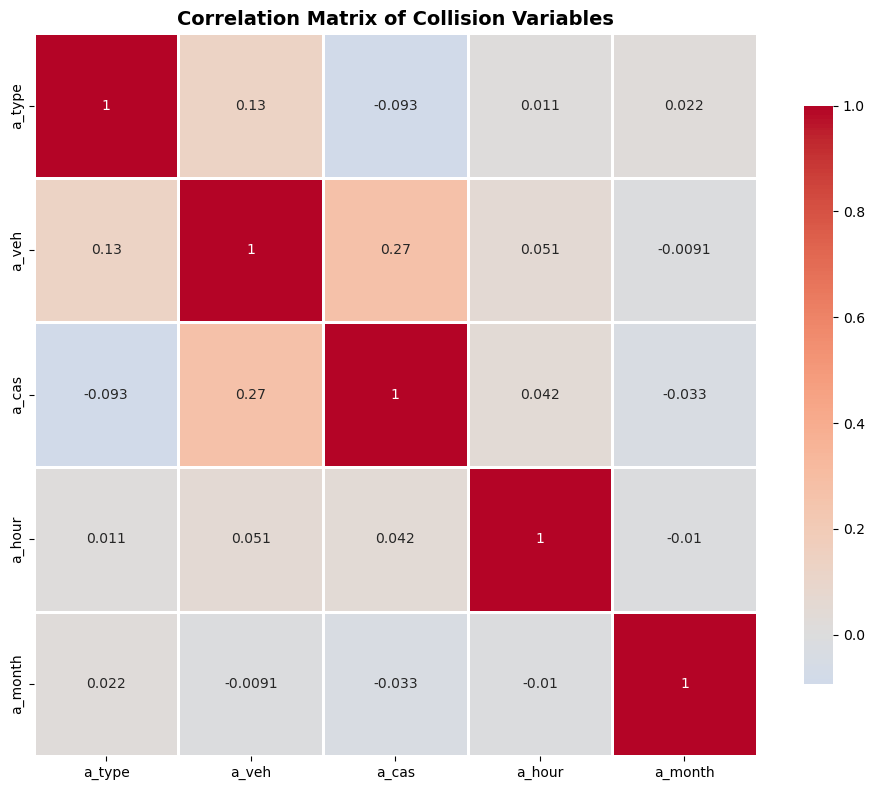


Key Findings:
- Vehicles vs Casualties correlation: 0.272
- Severity vs Casualties correlation: -0.093


In [45]:
# Correlation Analysis
print("Correlation Analysis")
print("=" * 60)

# Select numeric columns for correlation
numeric_cols = ['a_type', 'a_veh', 'a_cas', 'a_hour', 'a_month']
correlation_matrix = dfCol[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Collision Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nKey Findings:")
print(f"- Vehicles vs Casualties correlation: {dfCol['a_veh'].corr(dfCol['a_cas']):.3f}")
print(f"- Severity vs Casualties correlation: {dfCol['a_type'].corr(dfCol['a_cas']):.3f}")

In [46]:
# Chi-square test: Severity vs District
print("Statistical Test: Severity Distribution Across Districts")
print("=" * 60)

contingency_table = pd.crosstab(dfCol['District_Name'], dfCol['Severity'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print("\nResult: Severity distribution SIGNIFICANTLY differs across districts (p < 0.05)")
else:
    print("\nResult: No significant difference in severity distribution across districts")

print("\nContingency Table:")
display(contingency_table)

Statistical Test: Severity Distribution Across Districts


KeyError: 'District_Name'